In [1]:
import pandas as pd
import json
import seaborn as sns

# Seaborn config:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")


import cleaning_functions as cf
from config import matches_list
from config import history_list

# Club csv:

In [2]:
clubs=pd.read_csv("Data/clubs.csv")

In [3]:
clubs

,id,country,name,zone_id,saas,status
0,875d32df-3dea-4cf4,Italy,Padel Elite Top Club,Europe/Rome,ANEMONE,ACTIVE
1,875d33df-3dea-4df4,Italy,Padel Center,Europe/Rome,ANEMONE,ACTIVE
2,da7cb23b-43b3-11e8,Spain,Europadel,Europe/Madrid,ANEMONE,ACTIVE
3,da7cb22b-43b3-11e8,Spain,Centro Padel,Europe/Madrid,ANEMONE,ACTIVE
4,a328d271-7036-47b4,Denmark,World of Padel,Europe/Copenhagen,ANEMONE,ACTIVE
5,cc3b6516-7bfc-4504,Denmark,Padel Box,Europe/Copenhagen,ANEMONE,ACTIVE
6,da79175c-43b3-11e8,Spain,Pádel Madrid,Europe/Madrid,SYLTEKCRM,ACTIVE
7,da78dd3c-43b3-11e8,Spain,Pádel Club,Europe/Madrid,SYLTEKCRM,ACTIVE
8,a7cde49f-630d-41eb,España,Pádel Club,Europe/Madrid,SYLTEKCRM,ACTIVE
9,da76cbee-43b3-11e8,Spain,Padel Indoor,Europe/Madrid,SYLTEKCRM,ACTIVE


In [4]:
clubs.country.unique()

array(['Italy', 'Spain', 'Denmark', 'España', 'Belgium', 'Mexico'],
      dtype=object)

In [5]:
clubs=clubs.replace({"España":"Spain"})

In [6]:
clubs.country.unique()

array(['Italy', 'Spain', 'Denmark', 'Belgium', 'Mexico'], dtype=object)

# Matches json:

In [7]:
matches=pd.DataFrame(matches_list)

In [8]:
matches.head()

,_id,is_canceled,created_at,start_date,end_date,owner_id,sport_id,club_info,registered_users
0,a57512cb-72da-4136,False,2021-12-30 12:20:02.793 UTC,2021-12-30 13:00:00 UTC,2021-12-30 13:30:00 UTC,AICKMMP,TENNIS,"[{'club_id': 'da78dd3c-43b3-11e8', 'club_name'...","[{'user_id': 'AICKMMP', 'registration_date': '..."
1,644817a3-6bc2-4e34,False,2021-11-07 19:14:45.37 UTC,2021-11-07 18:30:00 UTC,2021-11-07 19:00:00 UTC,AKPKMI,TENNIS,"[{'club_id': 'da78dd3c-43b3-11e8', 'club_name'...","[{'user_id': 'AKPKMI', 'registration_date': '2..."
2,cae7df5b-c7c6-4254,False,2021-10-31 13:21:11.241 UTC,2021-11-01 12:00:00 UTC,2021-11-01 12:30:00 UTC,CPAPMM,PADEL,"[{'club_id': 'da78dd3c-43b3-11e8', 'club_name'...","[{'user_id': 'CPAPMM', 'registration_date': '2..."
3,93a9a542-a91a-4342,True,2021-10-07 17:37:23.694 UTC,2021-10-11 08:00:00 UTC,2021-10-11 09:30:00 UTC,IKMPK,PADEL,"[{'club_id': 'da78dd3c-43b3-11e8', 'club_name'...","[{'user_id': 'IKMPK', 'registration_date': '20..."
4,42680533-6e5d-43e6,False,2021-10-02 09:06:17.116 UTC,2021-10-09 09:00:00 UTC,2021-10-09 10:00:00 UTC,ACPAIME,TENNIS,"[{'club_id': 'da78dd3c-43b3-11e8', 'club_name'...","[{'user_id': 'ACPAIME', 'registration_date': '..."


In [9]:
matches=matches.drop(["club_info", "registered_users"], axis=1)

In [10]:
matches.head()

,_id,is_canceled,created_at,start_date,end_date,owner_id,sport_id
0,a57512cb-72da-4136,False,2021-12-30 12:20:02.793 UTC,2021-12-30 13:00:00 UTC,2021-12-30 13:30:00 UTC,AICKMMP,TENNIS
1,644817a3-6bc2-4e34,False,2021-11-07 19:14:45.37 UTC,2021-11-07 18:30:00 UTC,2021-11-07 19:00:00 UTC,AKPKMI,TENNIS
2,cae7df5b-c7c6-4254,False,2021-10-31 13:21:11.241 UTC,2021-11-01 12:00:00 UTC,2021-11-01 12:30:00 UTC,CPAPMM,PADEL
3,93a9a542-a91a-4342,True,2021-10-07 17:37:23.694 UTC,2021-10-11 08:00:00 UTC,2021-10-11 09:30:00 UTC,IKMPK,PADEL
4,42680533-6e5d-43e6,False,2021-10-02 09:06:17.116 UTC,2021-10-09 09:00:00 UTC,2021-10-09 10:00:00 UTC,ACPAIME,TENNIS


#### Users:

In [11]:
users=cf.get_users(matches_list)

In [12]:
users.head()

,user_id,registration_date,price,currency
0,AICKMMP,2021-12-30 12:21:02.793 UTC,6.25,EUR
1,AKPKMI,2021-11-07 19:15:45.37 UTC,7.25,EUR
2,CPAPMM,2021-10-31 13:22:11.241 UTC,7.75,EUR
3,IKMPK,2021-10-07 17:38:23.694 UTC,10.50,EUR
4,ACPAIME,2021-10-02 09:07:17.116 UTC,12.50,EUR


#### Clubs:

In [13]:
clubs_info=cf.get_infoclub(matches_list)

In [14]:
clubs_info.sample(10)

,club_id,club_name,city,Latitud,Longitud
6892,da7cb23b-43b3-11e8,Europadel,Alcorcón,40.339690,-3.808376
38647,875d32df-3dea-4cf4,Padel Elite Top Club,Paderno Dugnano,45.564150,9.151457
41833,a328d271-7036-47b4,World of Padel,Ikast,56.120436,9.171165
50919,cc3b6516-7bfc-4504,Padel Box,Odense C,55.412579,10.385509
89946,da76cbee-43b3-11e8,Padel Indoor,Barakaldo,43.288084,-3.014334
3966,da79175c-43b3-11e8,Pádel Madrid,Madrid,40.502622,-3.673856
24690,cc3b6516-7bfc-4504,Padel Box,Odense C,55.412579,10.385509
13474,da78dd3c-43b3-11e8,Pádel Club,Madrid,40.499493,-3.713107
63110,da76cbee-43b3-11e8,Padel Indoor,Barakaldo,43.289526,-3.013408
43212,a7cde49f-630d-41eb,Pádel Club,Madrid,40.386939,-3.623781


#### Concatenated dataframe with all information:

In [16]:
total = pd.concat([matches, clubs_info, users], axis=1)

In [17]:
total.head(2)

,_id,is_canceled,created_at,start_date,end_date,owner_id,sport_id,club_id,club_name,city,Latitud,Longitud,user_id,registration_date,price,currency
0,a57512cb-72da-4136,False,2021-12-30 12:20:02.793 UTC,2021-12-30 13:00:00 UTC,2021-12-30 13:30:00 UTC,AICKMMP,TENNIS,da78dd3c-43b3-11e8,Pádel Club,Madrid,40.499493,-3.713107,AICKMMP,2021-12-30 12:21:02.793 UTC,6.25,EUR
1,644817a3-6bc2-4e34,False,2021-11-07 19:14:45.37 UTC,2021-11-07 18:30:00 UTC,2021-11-07 19:00:00 UTC,AKPKMI,TENNIS,da78dd3c-43b3-11e8,Pádel Club,Madrid,40.499493,-3.713107,AKPKMI,2021-11-07 19:15:45.37 UTC,7.25,EUR


In [18]:
total.sort_values(by="created_at").head(1) # Data from 25.03.2021 until 15.01.2022

,_id,is_canceled,created_at,start_date,end_date,owner_id,sport_id,club_id,club_name,city,Latitud,Longitud,user_id,registration_date,price,currency
1555,740a0491-7a86-4217,True,2021-03-25 16:48:21.301 UTC,2021-10-07 15:30:00 UTC,2021-10-07 17:00:00 UTC,AEMGNN,PADEL,da7cb23b-43b3-11e8,Europadel,Alcorcón,40.33969,-3.808376,AEMGNN,2021-03-25 16:49:21.301 UTC,28.0,EUR


In [19]:
total["country"]=total.city.apply(cf.get_country)

In [22]:
total.sample()

,_id,is_canceled,created_at,start_date,end_date,owner_id,sport_id,club_id,club_name,city,Latitud,Longitud,user_id,registration_date,price,currency,country
92391,aed87db3-8379-4336,True,2021-11-20 23:00:17.243 UTC,2021-11-28 10:00:00 UTC,2021-11-28 11:00:00 UTC,IPMMGE,TENNIS,da79175c-43b3-11e8,Pádel Madrid,Madrid,40.502622,-3.673856,IPMMGE,2021-11-20 23:00:17.199 UTC,6.9,EUR,Spain


#### How many matches have been played overall?

70,985 matches have been played.

In [36]:
played=total.loc[(total["is_canceled"]== False)]

In [41]:
played.shape

(70985, 16)

#### Where are we present and how are we performing?

As you can see in the following graph and map, Playtomic is mainly present in Spain but it has also presence in other 4 countries: Italy, Denmark, Belgium and Mexico. 

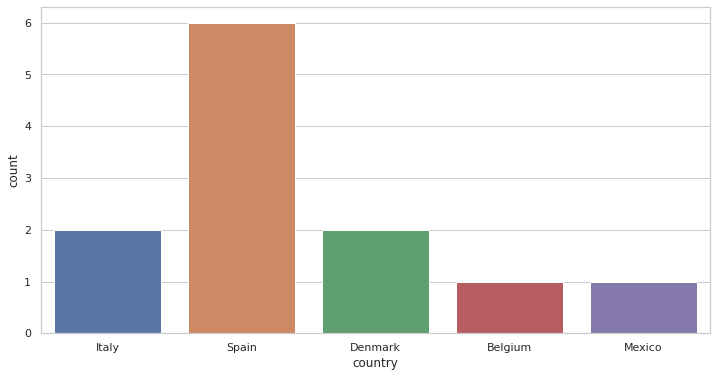

In [58]:
sns.countplot(data=clubs, x="country");

In [24]:
mapa=cf.map(matches_list)

In [25]:
mapa

In [23]:
played_bycity=total.groupby(["country", "is_canceled"]).count()

In [24]:
played_bycity

_id  created_at  start_date  end_date  owner_id  \
country is_canceled                                                      
Belgium False         7793        7793        7793      7793      7793   
        True          2597        2597        2597      2597      2597   
Denmark False         3676        3676        3676      3676      3676   
        True           356         356         356       356       356   
Italy   False        18357       18357       18357     18357     18357   
        True          8408        8408        8408      8408      8408   
Mexico  False        10093       10093       10093     10093     10093   
        True          1796        1796        1796      1796      1796   
Spain   False        31066       31066       31066     31066     31066   
        True          9581        9581        9581      9581      9581   

                     sport_id  club_id  club_name   city  Latitud  Longitud  \
country is_canceled                                                           
Belgium False            7793     7793       7793   7793     7793      7793   
        True             2597     2597       2597   2597     2597      2597   
Denmark False            3676     3676       3676   3676     3676      3676   
        True              356      356        356    356      356       356   
Italy   False           18357    18357      18357  18357    18357     18357   
        True             8408     8408       8408   8408     8408      8408   
Mexico  False           10093    10093      10093  10093    10093     10093   
        True             1796     1796       1796   1796     1796      1796   
Spain   False           31066    31066      31066  31066    31066     31066   
        True             9581     9581       9581   9581     9581      9581   

                     user_id  registration_date  price  currency  
country is_canceled                                               
Belgium False           7793               7793   7793      7793  
        True            2597               2597   2597      2597  
Denmark False           3676               3676   3676      3676  
        True             356                356    356       356  
Italy   False          18357              18357  18357     18357  
        True            8408               8408   8408      8408  
Mexico  False          10093              10093  10093     10093  
        True            1796               1796   1796      1796  
Spain   False          31066              31066  31066     31066  
        True            9581               9581   9581      9581

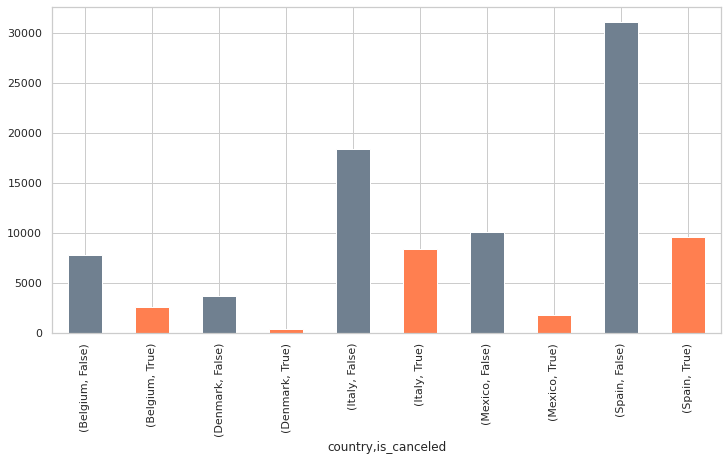

In [25]:
total.groupby(["country", "is_canceled"])["is_canceled"].count().plot(kind="bar", color=["slategray","coral"]); 

Note: Spain (Alcorcón, Barakaldo, Madrid)
      Mexico(Cuajimalpa)
      Belgium (Edegem)
      Denmark (Ikast, Odense)
      Paderno Dugnano (Italy)

# Matches history json:

In [4]:
history=pd.DataFrame(history_list)

In [5]:
history.head()

,_id,match_id,created_at,event_type,requester_type,requester_id,user_id,cancel_reason
0,1b1859b1-63ba-47be,9a2b868c-fae4-494a,2021-12-15 11:23:38.24 UTC,PLAYER_ADDED,SYSTEM,EEGEI,AAEAKIR,NaN
1,27034602-f4c4-4efa,9a2b868c-fae4-494a,2021-12-15 11:23:38.243 UTC,PLAYER_ADDED,SYSTEM,EEGEI,ACRKPAA,NaN
2,105a242d-f9c2-4ac6,9a2b868c-fae4-494a,2021-12-15 11:23:38.227 UTC,PLAYER_ADDED,SYSTEM,EEGEI,AAECMPG,NaN
3,19032d60-dd6a-43cf,9a2b868c-fae4-494a,2021-12-15 11:23:38.216 UTC,MATCH_CREATED,SYSTEM,EEGEI,NaN,NaN
4,fa3a57c2-affc-4732,9a2b868c-fae4-494a,2021-12-18 13:06:53.03 UTC,PLAYER_REMOVED,CUSTOMER_OWNER,EEGEI,AAEAKIR,NaN


In [6]:
history.shape

(3313, 8)

In [7]:
history["event_type"].unique()

array(['PLAYER_ADDED', 'MATCH_CREATED', 'PLAYER_REMOVED',
       'MATCH_PUBLISHED', 'PLAYER_ACCEPTED', 'PLAYER_JOINED_AND_PAID',
       'PLAYER_LEFT', 'PLAYER_REJECTED', 'PLAYER_REQUESTED_SPOT',
       'MATCH_CANCELED', 'DEBT_DISCHARGED', 'PLAYER_CONTACT_ADDED',
       'PLAYER_JOIN_REQUEST_CANCELED', 'END_TIME_UPDATED',
       'START_TIME_UPDATED'], dtype=object)